In [1]:
from vae.models.simple_vae import VAE
from vae.models.cnn import CNN_VAE
from vae.models.training import train_vae, create_vae_model

import numpy as np

import torch

from matplotlib import pyplot as plt

2024-07-19 16:46:13.958686: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/Caskroom/miniconda/base/envs/vae/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/usr/local/Caskroom/miniconda/base/envs/vae/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CC4BC91F-8B6A-3F9A-B9EB-A2B9D578E202> /usr/local/Caskroom/miniconda/base/envs/vae/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <5310731F-64FC-310E-B88B-E06F64BB3F98> /usr/local/Caskroom/miniconda/base/envs/vae/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality 

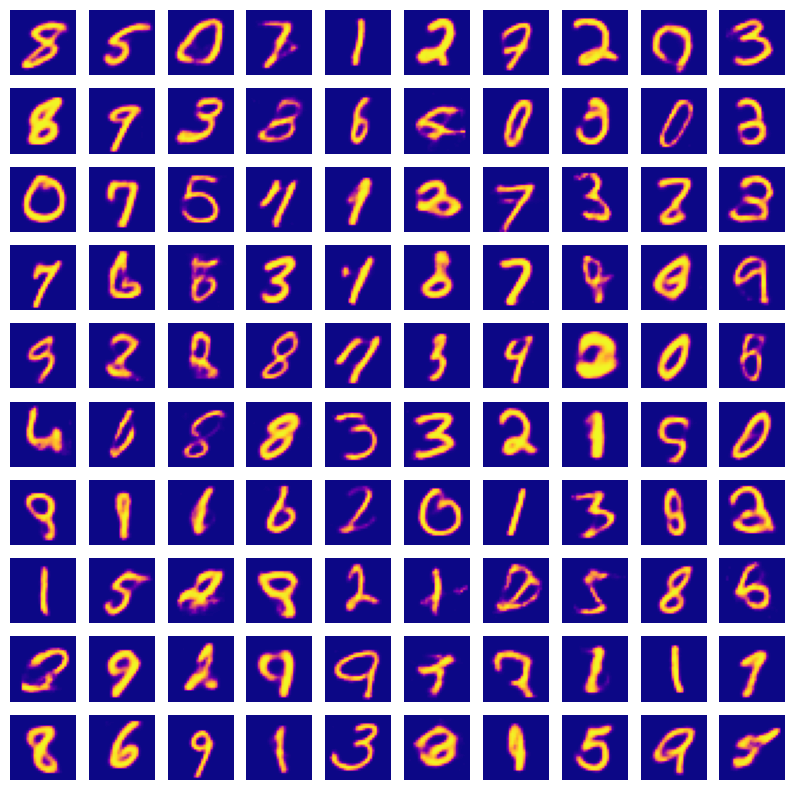

In [6]:
n_layers = 4
geometry = "flat"
latent_dim_factor = 0.2

dim = 748

model = create_vae_model(dim=np.array([28, 28]), latent_dim_factor=latent_dim_factor, n_layers=n_layers, geometry=geometry)

model_save_path = "iwae_10_plog_k_1000.pth"
model.load_state_dict(torch.load(model_save_path, map_location=torch.device('cpu')))

_ = model.eval()

n = 10

num_samples=n*n

def generate_samples(model, num_samples=10, latent_dim=156):
    # Set the model to evaluation mode
    model.eval()
    
    # Sample from a normal distribution (mean=0, std=1)
    with torch.no_grad():
        z = torch.randn(num_samples, latent_dim)
        generated_samples = model.decoder(z)
        
    return generated_samples

new_samples = generate_samples(model, num_samples=num_samples)

image_size = (28, 28)
new_samples = new_samples.view(n, n, *image_size).cpu()

# Plot the generated samples
fig, axes = plt.subplots(int(np.sqrt(num_samples)), int(np.sqrt(num_samples)), figsize=(10, 10))
for i in range(int(np.sqrt(num_samples))):
    for j in range(int(np.sqrt(num_samples))):
        ax = axes[i][j]
        ax.imshow(new_samples[i][j], cmap='plasma')
        ax.axis('off')

plt.show()

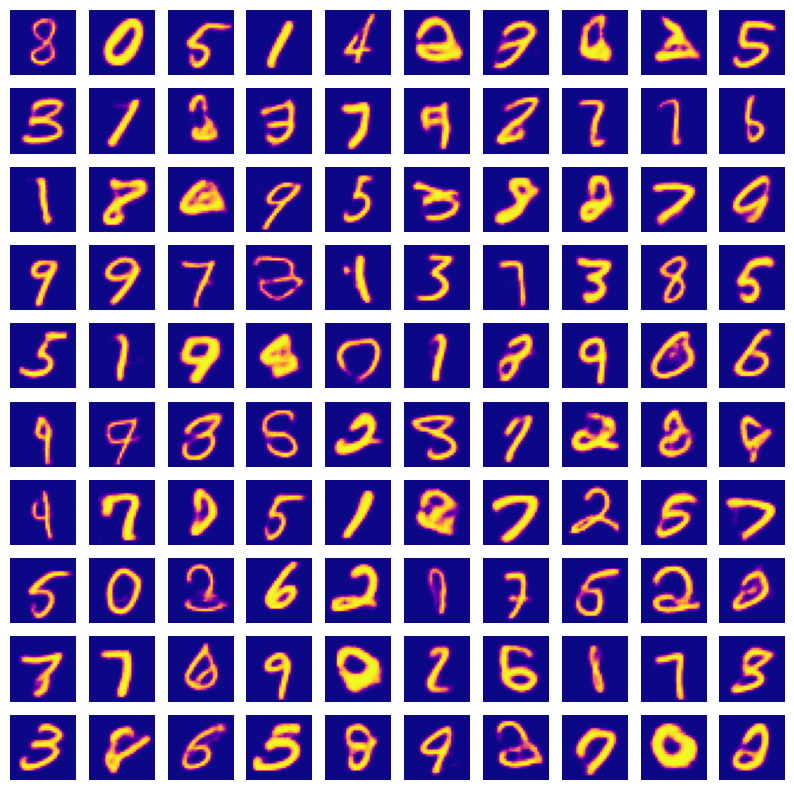

In [7]:
i = 5
latent_factor = 0.2
length = 748
latent_dim = 156

model = CNN_VAE(latent_dim=latent_dim, i=i, spectral_norm=False)

model_save_path = "cnn_iwae_0_plog_k_100.pth"
model.load_state_dict(torch.load(model_save_path, map_location=torch.device('cpu')))

_ = model.eval()

n = 10

num_samples=n*n

def generate_samples(model, num_samples=10, latent_dim=156):
    # Set the model to evaluation mode
    model.eval()
    
    # Sample from a normal distribution (mean=0, std=1)
    with torch.no_grad():
        z = torch.randn(num_samples, latent_dim)
        generated_samples = model.decoder(z)
        
    return generated_samples

new_samples = generate_samples(model, num_samples=num_samples)

image_size = (28, 28)
new_samples = new_samples.view(n, n, *image_size).cpu()

# Plot the generated samples
fig, axes = plt.subplots(int(np.sqrt(num_samples)), int(np.sqrt(num_samples)), figsize=(10, 10))
for i in range(int(np.sqrt(num_samples))):
    for j in range(int(np.sqrt(num_samples))):
        ax = axes[i][j]
        ax.imshow(new_samples[i][j], cmap='plasma')
        ax.axis('off')

plt.show()

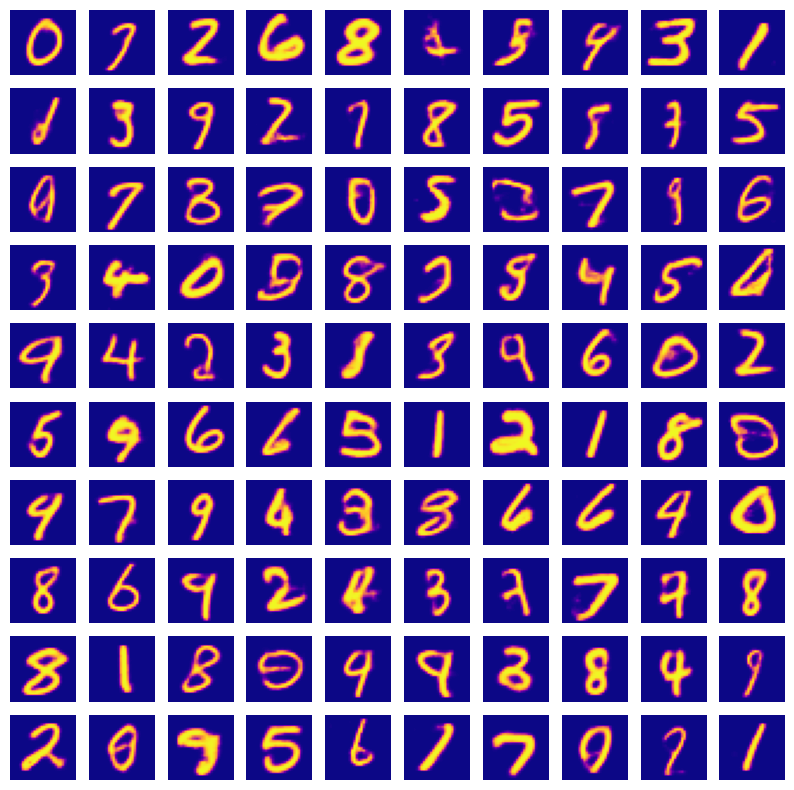

In [8]:
i = 5
latent_factor = 0.2
length = 748
latent_dim = 156

model = CNN_VAE(latent_dim=latent_dim, i=i, spectral_norm=False)

model_save_path = "cnn_iwae_10_plog_k_100.pth"
model.load_state_dict(torch.load(model_save_path, map_location=torch.device('cpu')))

_ = model.eval()

n = 10

num_samples=n*n

def generate_samples(model, num_samples=10, latent_dim=156):
    # Set the model to evaluation mode
    model.eval()
    
    # Sample from a normal distribution (mean=0, std=1)
    with torch.no_grad():
        z = torch.randn(num_samples, latent_dim)
        generated_samples = model.decoder(z)
        
    return generated_samples

new_samples = generate_samples(model, num_samples=num_samples)

image_size = (28, 28)
new_samples = new_samples.view(n, n, *image_size).cpu()

# Plot the generated samples
fig, axes = plt.subplots(int(np.sqrt(num_samples)), int(np.sqrt(num_samples)), figsize=(10, 10))
for i in range(int(np.sqrt(num_samples))):
    for j in range(int(np.sqrt(num_samples))):
        ax = axes[i][j]
        ax.imshow(new_samples[i][j], cmap='plasma')
        ax.axis('off')

plt.show()